In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns
import os
from datetime import datetime 
%matplotlib inline

In [3]:
#load data
df = pd.read_csv('OPdatasheet.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
0,2079,1947,2n Cycle,Married,"₹81,044.00",0,0,27-12-2013,0,450,...,0,0,0,0,0,0,3,11,0,1208
1,2285,1954,Master,Together,"₹36,634.00",0,1,28-05-2013,0,213,...,0,0,0,0,0,0,3,11,0,335
2,4047,1954,PhD,Married,"₹65,324.00",0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,544
3,4073,1954,2n Cycle,Married,"₹63,564.00",0,0,29-01-2014,0,769,...,1,0,0,0,0,0,3,11,1,1215
4,9477,1954,PhD,Married,"₹65,324.00",0,1,11-01-2014,0,384,...,0,0,0,0,0,0,3,11,0,544


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Observation:

1. There are a total of 30 columns and 2,240 observations in the dataset.
2. We can see that the Income column has less than 2,240 non-null values i.e. column has missing values.
3. There are dollar signs and comma in the values of Income column.
4. Income's data type is string - we need to convert it into float data type.
5. Dt_Customer's data type is string - we need to convert it into datetime data type.

In [6]:
# identifying number of missing values

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
TotalMntSpent           0
dtype: int64

# Observation:

1. There are 24 missing values in Income column.

In [7]:
# checking which index contains these missing values in income column

df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
118,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,0,0,0,0,0,0,3,11,0,603
281,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,0,0,0,0,0,3,11,0,19
404,3769,1972,PhD,Together,NaN,1,0,02-03-2014,17,25,...,0,0,0,0,0,0,3,11,0,42
453,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,0,0,0,0,3,11,0,637
521,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,0,0,0,0,0,0,3,11,0,404
581,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,0,0,0,0,0,3,11,0,109
899,10475,1970,Master,Together,NaN,0,1,01-04-2013,39,187,...,0,0,0,0,0,0,3,11,0,317
1001,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,0,0,0,0,0,3,11,0,18
1103,4345,1964,2n Cycle,Single,NaN,1,1,12-01-2014,49,5,...,0,0,0,0,0,0,3,11,0,21
1184,7187,1969,Master,Together,NaN,1,1,18-05-2013,52,375,...,0,0,0,0,0,0,3,11,0,721


In [14]:
df.rename(columns={' Income ':'Income'}, inplace=True)

In [16]:
# cleaning income data by replacing any non-numeric character with blank

df['Income'] = df['Income'].astype(str).str.replace('$', '', regex=False)
df['Income'] = df['Income'].astype(str).str.replace(',', '', regex=False)
df['Income'] = df['Income'].astype(str).astype(float)

In [17]:
df['Income']

0       8104400.0
1       3663400.0
2       6532400.0
3       6356400.0
4       6532400.0
          ...    
2235    4631000.0
2236    7841600.0
2237    6647600.0
2238    3105600.0
2239    6581900.0
Name: Income, Length: 2240, dtype: float64

In [18]:
df.info() # We have changed Income's data type from string to float and also removed any non-numeric characters.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [19]:
# Now, let's fill the missing values of income with the median of Income column.

df['Income'].fillna(int(df['Income'].median()), inplace=True)

In [20]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
TotalMntSpent          0
dtype: int64

# There are no missing values in any of the columns. All missing values have been removed.

In [21]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

1. We can combine the category 'Alone' with 'Single'.
2. It is not clear from the data that what do 'Absurd' and 'YOLO' actually mean.We can remove them from our analysis as they don't occur much. 
3. The most common marital status is 'Married.'

In [22]:
# Replacing Alone with Single

df["Marital_Status"].replace(["Alone",], "Single", inplace=True)

# Dropping the entry that contains "Absurd" and "YOLO" as marital status

df.drop(df[df['Marital_Status'] == "YOLO"].index, inplace = True)
df.drop(df[df['Marital_Status'] == "Absurd"].index, inplace = True)

In [23]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

1. As we can see, entries of "Single" and "Alone" are combined. Also, entries containing "Absurd" and "YOLO" are dropped.

In [24]:
df['Education'].value_counts()

Graduation    1126
PhD            484
Master         369
2n Cycle       203
Basic           54
Name: Education, dtype: int64

1. The most common educational status is Graduation
2. In education, 2n cycle and Master almost means the same. We can combine these two categories.

In [25]:
# In education, 2n cycle and Master almost means the same. We can combine these two categories.

df["Education"].replace("2n Cycle", "Master", inplace=True)

In [26]:
df['Education'].value_counts()

Graduation    1126
Master         572
PhD            484
Basic           54
Name: Education, dtype: int64

As we can see, entries of "Single" and "Alone" are combined.

In [27]:
df.describe() 

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
count,2236.000000,2236.000000,2.236000e+03,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000
mean,5591.551878,1968.796512,5.222338e+06,0.444991,0.506261,49.147138,303.873435,26.271020,166.924419,37.405188,...,0.072898,0.074687,0.072451,0.063953,0.013417,0.009392,3.0,11.0,0.148479,605.436047
std,3245.240106,11.980604,2.505201e+06,0.538551,0.544615,28.954880,336.876776,39.761356,225.778550,54.436749,...,0.260027,0.262944,0.259291,0.244725,0.115077,0.096477,0.0,0.0,0.355654,602.507355
min,0.000000,1893.000000,1.730000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,5.000000
25%,2828.250000,1959.000000,3.550250e+06,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,68.000000
50%,5458.500000,1970.000000,5.138150e+06,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,395.500000
75%,8427.750000,1977.000000,6.828975e+06,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1044.250000
max,11191.000000,1996.000000,6.666660e+07,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000


1. The minimum birth year is reported as 1893 and the current year is 2022. It is highly likely that the person is not alive.
Let's check the number of entries for which year_birth is less than 1920.

In [29]:
df[df['Year_Birth'] <= 1920] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
511,11004,1893,Master,Single,6018200.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,0,3,11,0,22
820,1150,1899,PhD,Together,8353200.0,0,0,26-09-2013,36,755,...,0,0,1,0,0,0,3,11,0,1853
2223,7829,1900,Master,Divorced,3664000.0,1,0,26-09-2013,99,15,...,0,0,0,0,0,1,3,11,0,65


In [30]:
# keeping data for customers having birth year >1900
# removing outliers in year_birth

df = df[df['Year_Birth'] > 1920]

In [32]:
# Changing the data type of Dt_customer from string to datetime

df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2233 non-null   int64         
 1   Year_Birth           2233 non-null   int64         
 2   Education            2233 non-null   object        
 3   Marital_Status       2233 non-null   object        
 4   Income               2233 non-null   float64       
 5   Kidhome              2233 non-null   int64         
 6   Teenhome             2233 non-null   int64         
 7   Dt_Customer          2233 non-null   datetime64[ns]
 8   Recency              2233 non-null   int64         
 9   MntWines             2233 non-null   int64         
 10  MntFruits            2233 non-null   int64         
 11  MntMeatProducts      2233 non-null   int64         
 12  MntFishProducts      2233 non-null   int64         
 13  MntSweetProducts     2233 non-nul

In [34]:
numeric_cols = df.select_dtypes(include=['number']).columns

numeric_cols

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'TotalMntSpent'],
      dtype='object')

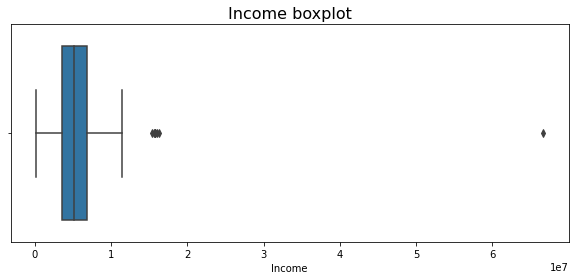

In [62]:
# See if there is any outliers
#  Boxplot for income

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

1. We can see from the boxplot that there are some outliers in the income variable.
2. Let's find the value at upper whisker to check how many observations are marked as outliers.

In [63]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
upper_whisker

11754100.0

In [64]:
#Checking the observations marked as outliers

df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalMntSpent
325,4931,1977,Graduation,Together,15714600.0,0,0,2013-04-29,13,1,...,0,0,0,0,0,0,3,11,0,1730
495,1501,1982,PhD,Married,16080300.0,0,0,2012-04-08,21,55,...,0,0,0,0,0,0,3,11,0,1717
531,9432,1977,Graduation,Together,66666600.0,1,0,2013-02-06,23,9,...,0,0,0,0,0,0,3,11,0,62
732,1503,1976,PhD,Together,16239700.0,1,1,2013-03-06,31,85,...,0,0,0,0,0,0,3,11,0,107
850,5336,1971,Master,Together,15773300.0,1,0,2013-04-06,37,39,...,0,0,0,0,0,0,3,11,0,59
1839,5555,1975,Graduation,Divorced,15392400.0,0,0,2014-07-02,81,1,...,0,0,0,0,0,0,3,11,0,6
1917,11181,1949,PhD,Married,15692400.0,0,0,2013-08-29,85,2,...,0,0,0,0,0,0,3,11,0,8
2212,8475,1973,PhD,Married,15724300.0,0,1,2014-01-03,98,20,...,0,0,0,0,0,0,3,11,0,1608


In [65]:
# Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased significantly in the last 2 years
# We can delete the other 5 outliers

df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2228 non-null   int64         
 1   Year_Birth           2228 non-null   int64         
 2   Education            2228 non-null   object        
 3   Marital_Status       2228 non-null   object        
 4   Income               2228 non-null   float64       
 5   Kidhome              2228 non-null   int64         
 6   Teenhome             2228 non-null   int64         
 7   Dt_Customer          2228 non-null   datetime64[ns]
 8   Recency              2228 non-null   int64         
 9   MntWines             2228 non-null   int64         
 10  MntFruits            2228 non-null   int64         
 11  MntMeatProducts      2228 non-null   int64         
 12  MntFishProducts      2228 non-null   int64         
 13  MntSweetProducts     2228 non-nul

In [67]:
df.Kidhome.value_counts()

0    1286
1     894
2      48
Name: Kidhome, dtype: int64

In [68]:
df.Teenhome.value_counts()

0    1153
1    1023
2      52
Name: Teenhome, dtype: int64

1. Maximum number of kid and teen at home are 2.

In [69]:
# creating new columns to get overll picture of a customer: how many total children he/she has

#total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']

In [70]:
df.NumberofChildren.value_counts()

1    1122
0     635
2     418
3      53
Name: NumberofChildren, dtype: int64

1. Maximum number of customers have at least 1 child at home.

Text(0, 0.5, 'Products')

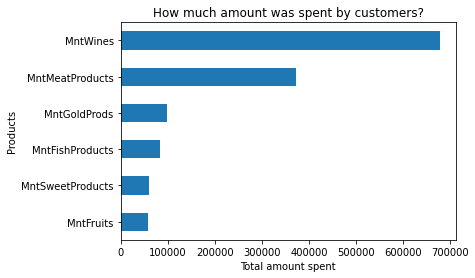

In [71]:
df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum().sort_values().plot.barh()
plt.title("How much amount was spent by customers?")
plt.xlabel("Total amount spent")
plt.ylabel("Products")

1. Wine was the most preffered customer, followed by meat.

Text(0, 0.5, 'Channel')

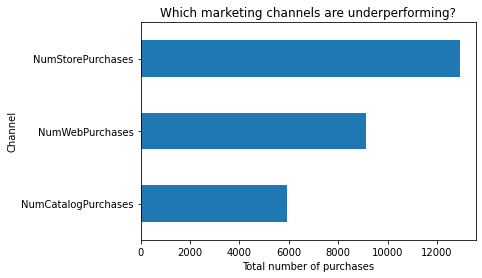

In [72]:
df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

Text(0, 0.5, 'Date')

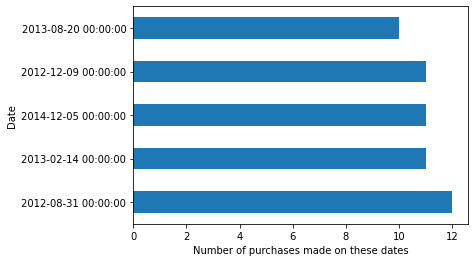

In [74]:
#TOP 5 customer dates
df.Dt_Customer.value_counts().head().plot.barh()
plt.xlabel("Number of purchases made on these dates")
plt.ylabel("Date")

In [79]:
#compare marital status
maritalstatus =df[['Marital_Status', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

In [80]:
maritalstatus.groupby('Marital_Status').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Divorced,74623,6329,34690,8070,6198,10647
Married,258748,22217,138803,30558,23062,36987
Single,138945,12893,87486,18360,13107,21069
Together,177192,14554,96913,22511,15078,24683
Widow,28372,2547,14559,3954,3002,4365


# We can say that married people have spent the most on Wines while widow people the least.

In [83]:
#compare educational status
educationalstatus =df[['Education', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

In [84]:
educationalstatus.groupby('Education').sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Basic,391,600,618,921,654,1233
Graduation,319897,34563,202133,48407,35282,57050
Master,162483,13784,88445,21254,14757,24099
PhD,195109,9593,81255,12871,9754,15369


# Graduation people have spent most on wines, followed by PhD and Master.
# So we can say that it is NOT necessary that higher the education, higher the spending on wines.

In [85]:
goldvschildren = df[['MntGoldProds', 'NumberofChildren']]

In [86]:
goldvschildren.groupby('NumberofChildren').sum()

,MntGoldProds
NumberofChildren,
0,40295
1,45824
2,10646
3,986


# From the above observation, we can infer that it isn't necessary that customers who have children at home are most likely to spend on gold. As we can see, customers with no children and customers with 1 child have almost spent the same on Golds, followed by 2 and 3 childrens.

In [89]:
# What does the average customer look like for this company?

df.mean()

ID                     5.595968e+03
Year_Birth             1.968893e+03
Income                 5.224192e+06
Kidhome                4.443447e-01
Teenhome               5.058348e-01
Recency                4.913734e+01
MntWines               3.042549e+02
MntFruits              2.627469e+01
MntMeatProducts        1.671683e+02
MntFishProducts        3.745646e+01
MntSweetProducts       2.713061e+01
MntGoldProds           4.387388e+01
NumDealsPurchases      2.324057e+00
NumWebPurchases        4.090215e+00
NumCatalogPurchases    2.663375e+00
NumStorePurchases      5.796679e+00
NumWebVisitsMonth      5.318671e+00
AcceptedCmp3           7.271095e-02
AcceptedCmp4           7.495512e-02
AcceptedCmp5           7.226212e-02
AcceptedCmp1           6.418312e-02
AcceptedCmp2           1.346499e-02
Complain               8.976661e-03
Z_CostContact          3.000000e+00
Z_Revenue              1.100000e+01
Response               1.485637e-01
TotalMntSpent          6.061589e+02
NumberofChildren       9.501

# An average customer:
 - has an annual income of 52,241 dollars.
 - has purchased 49 days ago.
 - has spent total of 606 dollars.
 - has spent most on wines (304 dollars), followed by meat (167 dollars).